In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.font_manager as fm
path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumGothic.ttf'
# path = 'C:\\Users\\myksh\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font_name = fm.FontProperties(fname=path).get_name()
print(font_name)
plt.rc('font', family=font_name)

plt.rcParams['font.family'] = 'NanumGothic'

#마이너스가 깨질 것을 방지
plt.rcParams['axes.unicode_minus'] = False

import pandas as pd

NanumGothic


# 기존 이미지에서 사용할 것만 추출

## 150종 음식 이미지 中 75개 추출

In [2]:
big_list = os.listdir('./data')
small_dic = {}
count = 0
for i in big_list[2:]:
    for j in os.listdir(f'./data/{i}'):
        small_dic[j] = i

len(small_dic)

150

In [3]:
food_list = list(small_dic.keys())
food_list[:5]

['갈비구이', '갈치구이', '고등어구이', '곱창구이', '닭갈비']

## bbox 개수 확인 + add image class

In [161]:
ori_list = ['갈비구이','고등어구이','닭갈비','삼겹살','양념치킨','후라이드치킨','경단','물냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','주꾸미볶음','보쌈','계란말이','계란후라이','김치찌개','찜닭','삼계탕','새우튀김']
add_list = ['가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']


len(ori_list), len(add_list)

(20, 10)

In [164]:
small_dic['가지구이'] = '구이'
small_dic['오므라이스'] = '밥'
small_dic['카레라이스'] = '밥'
small_dic['감자튀김'] = '튀김'
small_dic['고추장아찌'] = '장아찌'
small_dic['마늘장아찌'] = '장아찌'
small_dic['부대찌개'] = '찌개'
small_dic['떡국'] = '국'
small_dic['만두국'] = '국'
small_dic['게장'] = '장'

In [6]:
path = './data/'
properties_list = []
bbox_count = {}
cnt = 0 
for i in ori_list:
    image_path = path + f'{small_dic[i]}/{i}/'
    properties = os.listdir(image_path)[0]
    with open(image_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        print(i, len(content_list))
        bbox_count[i] = len(content_list)
        cnt += len(content_list)
        for c in content_list:
            properties_list.append({'name' : i, 'path' : c.split('=')[0], 'bbox' : c.split('=')[1] })

갈비구이 224
고등어구이 219
닭갈비 103
삼겹살 340
양념치킨 232
후라이드치킨 40
경단 232
물냉면 517
김밥 393
김치볶음밥 605
비빔밥 602
새우볶음밥 817
주꾸미볶음 918
보쌈 195
계란말이 209
계란후라이 572
김치찌개 96
찜닭 110
삼계탕 299
새우튀김 771


In [7]:
food_df = pd.DataFrame(properties_list)
food_df

,name,path,bbox
0,갈비구이,Img_000_0001,"45,76,538,404"
1,갈비구이,Img_000_0002,"228,270,431,218"
2,갈비구이,Img_000_0004,"0,167,470,538"
3,갈비구이,Img_000_0012,"0,318,740,556"
4,갈비구이,Img_000_0013,"17,12,282,346"
...,...,...,...
7489,새우튀김,Img_141_0998,"173,54,231,288"
7490,새우튀김,Img_141_0999,"180,108,216,156"
7491,새우튀김,Img_141_1000,"15,108,254,219"
7492,새우튀김,Img_141_1001,"220,75,157,323"


In [8]:
food_df[food_df['name']=='삼겹살']

,name,path,bbox
546,삼겹살,Img_008_0000,"8,74,268,434"
547,삼겹살,Img_008_0001,"217,122,297,248"
548,삼겹살,Img_008_0002,"181,54,459,421"
549,삼겹살,Img_008_0009,"20,112,280,142"
550,삼겹살,Img_008_0012,"574,379,286,256"
...,...,...,...
881,삼겹살,Img_008_0992,"0,163,375,289"
882,삼겹살,Img_008_0993,"163,4,337,284"
883,삼겹살,Img_008_0995,"209,5,266,212"
884,삼겹살,Img_008_0997,"139,134,216,126"


In [8]:
for i in food_df[food_df['name']=='삼겹살'].path:
    print(i)

Img_008_0000
Img_008_0001
Img_008_0002
Img_008_0009
Img_008_0012
Img_008_0013
Img_008_0022
Img_008_0023
Img_008_0024
Img_008_0034
Img_008_0035
Img_008_0038
Img_008_0040
Img_008_0042
Img_008_0043
Img_008_0046
Img_008_0049
Img_008_0053
Img_008_0058
Img_008_0059
Img_008_0063
Img_008_0064
Img_008_0067
Img_008_0068
Img_008_0071
Img_008_0072
Img_008_0076
Img_008_0077
Img_008_0079
Img_008_0088
Img_008_0089
Img_008_0093
Img_008_0097
Img_008_0099
Img_008_0103
Img_008_0104
Img_008_0107
Img_008_0108
Img_008_0109
Img_008_0110
Img_008_0111
Img_008_0113
Img_008_0114
Img_008_0115
Img_008_0118
Img_008_0122
Img_008_0124
Img_008_0125
Img_008_0128
Img_008_0130
Img_008_0133
Img_008_0134
Img_008_0135
Img_008_0136
Img_008_0139
Img_008_0144
Img_008_0147
Img_008_0148
Img_008_0152
Img_008_0155
Img_008_0156
Img_008_0160
Img_008_0162
Img_008_0165
Img_008_0173
Img_008_0175
Img_008_0176
Img_008_0177
Img_008_0179
Img_008_0180
Img_008_0181
Img_008_0185
Img_008_0191
Img_008_0195
Img_008_0196
Img_008_0204
Img_008_0205

## 선별한 이미지를 final 폴더에 복사 - 실행완료
- jpg (JPG) 파일만 저장하기로 함.

In [58]:
# import shutil 
# import glob

# for i in ori_list:
#     print(i)
#     src = f'./data/{small_dic[i]}/{i}/'
#     directory = f'./data/final/{small_dic[i]}/{i}/image/'
#     if not os.path.exists(directory):
#         os.makedirs(directory)
    
#     #JPG파일을 모두 jpg로 바꾸기
#     files = glob.glob(src+'*.JPG')
#     for name in files:
#         if not os.path.isdir(name): #디렉토리는 X
#             src_file = os.path.splitext(name)
#             os.rename(name, src_file[0]+'.jpg')
#     for p in food_df[food_df['name']==i].path:
#         if os.path.isfile(src + f'{p}.jpg'):
#             filename = f'{p}.jpg'
# #         elif os.path.isfile(src + f'{p}.png'):
# #             filename = f'{p}.png'
# #         elif os.path.isfile(src + f'{p}.JPG'):
# #             filename = f'{p}.JPG'
# #         elif os.path.isfile(src + f'{p}.jpeg'):
# #             filename = f'{p}.jpeg'
# #         elif os.path.isfile(src + f'{p}.bmp'):
# #             filename = f'{p}.bmp'
# #         elif os.path.isfile(src + f'{p}.gif'):
# #             filename = f'{p}.gif'
#         else:
#             continue
# #         print(src + f'{p}.jpg')
#         try:
#             shutil.copy2(src + filename, directory + filename)
#         except:
#             print('NOTING!!!!!!!!!!!!!!!')
#             continue

갈비구이
고등어구이
닭갈비
삼겹살
양념치킨
후라이드치킨
경단
물냉면
김밥
김치볶음밥
비빔밥
새우볶음밥
주꾸미볶음
보쌈
계란말이
계란후라이
김치찌개
찜닭
삼계탕
새우튀김


In [9]:
path = './data/'
bbox_dic1 = {}
bbox_count1 = {}
cnt = 0 
for i in ori_list:
    image_path = path + f'{small_dic[i]}/{i}/'
    properties = os.listdir(image_path)[0]
    with open(image_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        print(i, len(content_list))
        bbox_count1[i] = len(content_list)
        cnt += len(content_list)
        for i in content_list:
            bbox_dic1[i.split('=')[0]] = i.split('=')[1]      

갈비구이 224
고등어구이 219
닭갈비 103
삼겹살 340
양념치킨 232
후라이드치킨 40
경단 232
물냉면 517
김밥 393
김치볶음밥 605
비빔밥 602
새우볶음밥 817
주꾸미볶음 918
보쌈 195
계란말이 209
계란후라이 572
김치찌개 96
찜닭 110
삼계탕 299
새우튀김 771


In [10]:
#각 클래스별 이미지의 개수를 세기 위한 코드
count_dic = {}
for i in ori_list:
    for j in os.listdir(f'./data/final/{small_dic[i]}'):
        #properties, org_url.csv 제외 이미지 파일 개수만 저장
        count_dic[j] = len([i for i in os.listdir(f'./data/final/{small_dic[i]}/{j}/image/')])
count_dic

{'갈비구이': 224,
 '고등어구이': 219,
 '닭갈비': 103,
 '삼겹살': 338,
 '양념치킨': 230,
 '후라이드치킨': 39,
 '경단': 230,
 '물냉면': 508,
 '김밥': 383,
 '김치볶음밥': 605,
 '비빔밥': 602,
 '새우볶음밥': 817,
 '주꾸미볶음': 918,
 '보쌈': 191,
 '계란말이': 208,
 '계란후라이': 572,
 '김치찌개': 95,
 '찜닭': 110,
 '삼계탕': 299,
 '새우튀김': 771}

In [11]:
sum(count_dic.values())

7462

In [24]:
i = '물냉면'
path_list = []
for j in os.listdir(f'./data/final/{small_dic[i]}/{i}/image'):
    path_list.append(j[:-4])

In [25]:
path_list

['Img_052_0000',
 'Img_052_0001',
 'Img_052_0003',
 'Img_052_0004',
 'Img_052_0005',
 'Img_052_0006',
 'Img_052_0008',
 'Img_052_0009',
 'Img_052_0013',
 'Img_052_0014',
 'Img_052_0016',
 'Img_052_0017',
 'Img_052_0022',
 'Img_052_0023',
 'Img_052_0028',
 'Img_052_0034',
 'Img_052_0035',
 'Img_052_0037',
 'Img_052_0038',
 'Img_052_0040',
 'Img_052_0041',
 'Img_052_0042',
 'Img_052_0044',
 'Img_052_0050',
 'Img_052_0052',
 'Img_052_0053',
 'Img_052_0054',
 'Img_052_0056',
 'Img_052_0057',
 'Img_052_0061',
 'Img_052_0063',
 'Img_052_0066',
 'Img_052_0068',
 'Img_052_0069',
 'Img_052_0071',
 'Img_052_0072',
 'Img_052_0073',
 'Img_052_0074',
 'Img_052_0076',
 'Img_052_0077',
 'Img_052_0080',
 'Img_052_0083',
 'Img_052_0085',
 'Img_052_0093',
 'Img_052_0108',
 'Img_052_0109',
 'Img_052_0110',
 'Img_052_0111',
 'Img_052_0112',
 'Img_052_0113',
 'Img_052_0115',
 'Img_052_0116',
 'Img_052_0117',
 'Img_052_0122',
 'Img_052_0124',
 'Img_052_0125',
 'Img_052_0126',
 'Img_052_0132',
 'Img_052_0134

In [26]:
#jpg아닌 것들
set(food_df[food_df['name']=='물냉면'].path) - set(path_list)

{'Img_052_0021',
 'Img_052_0084',
 'Img_052_0103',
 'Img_052_0106',
 'Img_052_0107',
 'Img_052_0522',
 'Img_052_0940',
 'Img_052_0975',
 'Img_052_0976'}

# 추가할 데이터(건강관리이미지) 탐색

In [440]:
add_list

['가지구이', '오므라이스', '카레라이스', '감자튀김', '고추장아찌', '마늘장아찌', '부대찌개', '떡국', '만두국', '게장']

In [441]:
store_list = os.listdir('./data/건강관리이미지/Training/')
store_list

['가지구이',
 '갈비구이',
 '갈비탕',
 '감자볶음',
 '감자튀김',
 '게장',
 '경단',
 '고등어구이',
 '고르곤졸라피자',
 '고추장아찌',
 '국수',
 '김밥',
 '김치볶음밥',
 '김치찌개',
 '냉면',
 '달걀말이',
 '달걀볶음밥',
 '달걀후라이',
 '닭갈비',
 '닭찜',
 '돼지갈비찜',
 '돼지고기고추장불고기',
 '떡갈비',
 '떡국',
 '라면',
 '마늘장아찌',
 '마르게리따피자',
 '마르게리타피자',
 '만두국',
 '보쌈',
 '부대찌개',
 '브로컬리계란찜',
 '비빔밥',
 '삼겹살구이',
 '삼계탕',
 '새우만두',
 '새우볶음밥',
 '새우튀김',
 '송편',
 '양념치킨',
 '오므라이스',
 '짬뽕',
 '쪽갈비구이',
 '쭈꾸미볶음',
 '치즈피자',
 '카레라이스',
 '컵라면',
 '콤비네이션피자',
 '후라이드치킨',
 '후라이드치킨,날개']

- 폴더를 copy할 때는 `shutil.copytree` 사용

In [29]:
# for i in os.listdir('./data/건강관리이미지/Label/'): #[라벨]음식001_Tra_json ... 형식
#     for j in os.listdir(f'./data/건강관리이미지/Label/{i}'): #가리비 json, 갈비탕 json ... 형식
#         split_word = j.split('json')[0][:-1] #가리비 json -> 가리비 로 추출
#         if split_word in ori_list: #만약 ori_list에 존재하는 값이라면 ? 
#             ori_path = f'./data/건강관리이미지/Label/{i}/{j}/'
#             directory = f'./data/final/{small_dic[split_word]}/{split_word}/label/'
#             for k in os.listdir(ori_path):
#                 copy_path = f'{directory}/{k}'
# #                 print((ori_path+k, copy_path))
#                 shutil.copytree(ori_path, directory + filename)

In [108]:
for i in os.listdir('./data/건강관리이미지/Label/'): #[라벨]음식001_Tra_json ... 형식
    for j in os.listdir(f'./data/건강관리이미지/Label/{i}'): #가리비 json, 갈비탕 json ... 형식
        split_word = j.split('json')[0][:-1] #가리비 json -> 가리비 로 추출
        if split_word in ori_list: #만약 ori_list에 존재하는 값이라면 ? 
            ori_path = f'./data/건강관리이미지/Label/{i}/{j}/'
            print(f'{split_word} {small_dic[split_word]}:::::  {ori_path}')


닭갈비 구이:::::  ./data/건강관리이미지/Label/[라벨]음식001_Tra_json/닭갈비 json/
양념치킨 기타:::::  ./data/건강관리이미지/Label/[라벨]음식002_Tra_json/양념치킨 json/
갈비구이 구이:::::  ./data/건강관리이미지/Label/[라벨]음식101_Tra_json/갈비구이 json/
경단 떡:::::  ./data/건강관리이미지/Label/[라벨]음식102_Tra_json/경단 json/
고등어구이 구이:::::  ./data/건강관리이미지/Label/[라벨]음식102_Tra_json/고등어구이 json/
김밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식104_Tra_json/김밥 json/
김치볶음밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식104_Tra_json/김치볶음밥 json/
김치찌개 찌개:::::  ./data/건강관리이미지/Label/[라벨]음식104_Tra_json/김치찌개 json/
닭갈비 구이:::::  ./data/건강관리이미지/Label/[라벨]음식106_Tra_json/닭갈비 json/
보쌈 쌈:::::  ./data/건강관리이미지/Label/[라벨]음식203_Tra_json/보쌈 json/
비빔밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식204_Tra_json/비빔밥 json/
삼겹살 구이:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/삼겹살 json/
삼계탕 탕:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/삼계탕 json/
새우볶음밥 밥:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/새우볶음밥 json/
새우튀김 튀김:::::  ./data/건강관리이미지/Label/[라벨]음식206_Tra_json/새우튀김 json/


```
쭈꾸미볶음 : '[라벨]음식002_Tra_json',
후라이드치킨 : '[라벨]음식003_Tra_json',
감자볶음 : '[라벨]음식101_Tra_json',
게장 : '[라벨]음식102_Tra_json',
냉면, '[라벨]음식105_Tra_json',
닭찜, '[라벨]음식106_Tra_json',
달걀후라이, '[라벨]음식105_Tra_json',
떡국, '[라벨]음식108_Tra_json',
{'달걀말이' : '[라벨]음식001_Tra_json',
'오므라이스' : '[라벨]음식002_Tra_json',
'카레라이스' : '[라벨]음식003_Tra_json',
'가지구이' : '[라벨]음식101_Tra_json',
'감자튀김' : '[라벨]음식102_Tra_json',
'고추장아찌' : '[라벨]음식103_Tra_json',
'마늘장아찌' : '[라벨]음식110_Tra_json',
'부대찌개' : '[라벨]음식204_Tra_json',
}

ori_list = ['갈비구이','고등어구이','닭갈비','삼겹살','양념치킨','후라이드치킨','경단','물냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','주꾸미볶음','보쌈','계란말이','계란후라이','김치찌개','찜닭','삼계탕','새우튀김']
add_list = ['가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']
```

In [30]:
len(ori_list) + len(add_list)

30

In [31]:
set(add_list) - set(os.listdir('./data/건강관리이미지/final_label')) 

set()

## Bbox

### 개수확인
- 모두 동일

In [32]:
sh_list = os.listdir('./data/건강관리이미지/final_label')
print(len(sh_list))
sh_list

30


['가지구이',
 '갈비구이',
 '감자튀김',
 '게장',
 '경단',
 '고등어구이',
 '고추장아찌',
 '김밥',
 '김치볶음밥',
 '김치찌개',
 '냉면',
 '달걀말이',
 '달걀후라이',
 '닭갈비',
 '닭찜',
 '떡국',
 '마늘장아찌',
 '만두국',
 '보쌈',
 '부대찌개',
 '비빔밥',
 '삼겹살구이',
 '삼계탕',
 '새우볶음밥',
 '새우튀김',
 '양념치킨',
 '오므라이스',
 '쭈꾸미볶음',
 '카레라이스',
 '후라이드치킨']

In [33]:
label_path = './data/건강관리이미지/final_label/'
image_path = './data/건강관리이미지/Training/'

In [34]:
i = sh_list[0]
print(i)
os.listdir(label_path + i)

가지구이


['B080302XX_00001.json',
 'B080302XX_00002.json',
 'B080302XX_00003.json',
 'B080302XX_00004.json',
 'B080302XX_00005.json',
 'B080302XX_00006.json',
 'B080302XX_00007.json',
 'B080302XX_00008.json',
 'B080302XX_00010.json',
 'B080302XX_00014.json',
 'B080302XX_00017.json',
 'B080302XX_00020.json',
 'B080302XX_00023.json',
 'B080302XX_00024.json',
 'B080302XX_00025.json',
 'B080302XX_00026.json',
 'B080302XX_00027.json',
 'B080302XX_00029.json',
 'B080302XX_00030.json',
 'B080302XX_00031.json',
 'B080302XX_00033.json',
 'B080302XX_00034.json',
 'B080302XX_00035.json',
 'B080302XX_00036.json',
 'B080302XX_00037.json',
 'B080302XX_00038.json',
 'B080302XX_00039.json',
 'B080302XX_00040.json',
 'B080302XX_00041.json',
 'B080302XX_00043.json',
 'B080302XX_00044.json',
 'B080302XX_00046.json',
 'B080302XX_00047.json',
 'B080302XX_00048.json',
 'B080302XX_00049.json',
 'B080302XX_00050.json',
 'B080302XX_00051.json',
 'B080302XX_00052.json',
 'B080302XX_00053.json',
 'B080302XX_00054.json',


In [35]:
bbox_count = {}
for i in sh_list:
    bbox_count[i] = len(os.listdir(label_path + i))
    
image_count = {}
for i in sh_list:
    image_count[i] = len(os.listdir(image_path + i))

In [36]:
bbox_count, image_count

({'가지구이': 2044,
  '갈비구이': 7334,
  '감자튀김': 3912,
  '게장': 2258,
  '경단': 6208,
  '고등어구이': 4700,
  '고추장아찌': 1026,
  '김밥': 7360,
  '김치볶음밥': 5432,
  '김치찌개': 3104,
  '냉면': 6548,
  '달걀말이': 935,
  '달걀후라이': 5136,
  '닭갈비': 2779,
  '닭찜': 3212,
  '떡국': 1183,
  '마늘장아찌': 3206,
  '만두국': 3574,
  '보쌈': 7748,
  '부대찌개': 1972,
  '비빔밥': 4772,
  '삼겹살구이': 6218,
  '삼계탕': 5516,
  '새우볶음밥': 4582,
  '새우튀김': 6162,
  '양념치킨': 3264,
  '오므라이스': 2974,
  '쭈꾸미볶음': 2066,
  '카레라이스': 5350,
  '후라이드치킨': 6242},
 {'가지구이': 2044,
  '갈비구이': 7334,
  '감자튀김': 3912,
  '게장': 2258,
  '경단': 6208,
  '고등어구이': 4700,
  '고추장아찌': 1026,
  '김밥': 7360,
  '김치볶음밥': 5432,
  '김치찌개': 3104,
  '냉면': 6548,
  '달걀말이': 935,
  '달걀후라이': 5136,
  '닭갈비': 2779,
  '닭찜': 3212,
  '떡국': 1183,
  '마늘장아찌': 3206,
  '만두국': 3574,
  '보쌈': 7748,
  '부대찌개': 1972,
  '비빔밥': 4772,
  '삼겹살구이': 6218,
  '삼계탕': 5516,
  '새우볶음밥': 4582,
  '새우튀김': 6162,
  '양념치킨': 3264,
  '오므라이스': 2974,
  '쭈꾸미볶음': 2066,
  '카레라이스': 5350,
  '후라이드치킨': 6242})

In [39]:
sum(bbox_count.values()) - sum(image_count.values())

0

## Bbox 그리기

In [40]:
bbox_list = {}
for i in sh_list:
    bbox_list[i] = os.listdir(label_path + i)

In [41]:
bbox_list

{'가지구이': ['B080302XX_00001.json',
  'B080302XX_00002.json',
  'B080302XX_00003.json',
  'B080302XX_00004.json',
  'B080302XX_00005.json',
  'B080302XX_00006.json',
  'B080302XX_00007.json',
  'B080302XX_00008.json',
  'B080302XX_00010.json',
  'B080302XX_00014.json',
  'B080302XX_00017.json',
  'B080302XX_00020.json',
  'B080302XX_00023.json',
  'B080302XX_00024.json',
  'B080302XX_00025.json',
  'B080302XX_00026.json',
  'B080302XX_00027.json',
  'B080302XX_00029.json',
  'B080302XX_00030.json',
  'B080302XX_00031.json',
  'B080302XX_00033.json',
  'B080302XX_00034.json',
  'B080302XX_00035.json',
  'B080302XX_00036.json',
  'B080302XX_00037.json',
  'B080302XX_00038.json',
  'B080302XX_00039.json',
  'B080302XX_00040.json',
  'B080302XX_00041.json',
  'B080302XX_00043.json',
  'B080302XX_00044.json',
  'B080302XX_00046.json',
  'B080302XX_00047.json',
  'B080302XX_00048.json',
  'B080302XX_00049.json',
  'B080302XX_00050.json',
  'B080302XX_00051.json',
  'B080302XX_00052.json',
  'B

In [42]:
import json

In [147]:
i='후라이드치킨'
f'{label_path}{i}/'+np.random.choice(bbox_list[i])

'./data/건강관리이미지/final_label/후라이드치킨/B120239XX_08079.json'

In [148]:
random_imagepath = np.random.choice(bbox_list[i])
with open(f'{label_path}{i}/{random_imagepath}', "r") as f:
    file = json.load(f)[0]
file

{'Code Name': 'B120239XX_10335.jpg',
 'Name': 'chikin',
 'W': '0.381518755718207',
 'H': '0.566529492455418',
 'File Format': 'jpg',
 'Cat 1': '12',
 'Cat 2': '02',
 'Cat 3': '39',
 'Cat 4': 'xx',
 'Annotation Type': 'binding',
 'Point(x,y)': '0.477127172918573,0.563786008230453',
 'Label': '0',
 'Serving Size': 'xx',
 'Camera Angle': 'xx',
 'Cardinal Angle': 'xx',
 'Color of Container': 'xx',
 'Material of Container': 'xx',
 'Illuminance': 'xx'}

In [149]:
image_input.shape

(1620, 2430, 3)

In [150]:
x, y= float(file['Point(x,y)'].split(',')[0]), float(file['Point(x,y)'].split(',')[1])
w, h = float(file['W']), float(file['H'])
x,y,w,h

(0.477127172918573, 0.563786008230453, 0.381518755718207, 0.566529492455418)

In [151]:
(y*image_input.shape[0]) - ((float(file['H'])*image_input.shape[0])/2)

454.4444444444453

In [152]:
x*image_input.shape[0]

772.9460201280882

In [153]:
float(file['W'])*image_input.shape[0]

618.0603842634953

image_name ::  B120239XX_10335.jpg
(x,y), (w,h)  ::  (417.5242451967065, 613.2194787379984) (556.2543458371458, 1238.4334705075437)


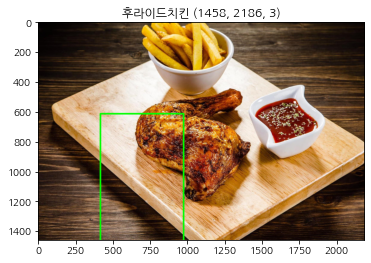

In [157]:
image_name = file['Code Name']
print('image_name :: ',image_name)
filePath = f'./data/건강관리이미지/Training/{i}/{image_name}'
stream = open(filePath.encode("utf-8") , "rb") 
bytes = bytearray(stream.read()) 
numpyArray = np.asarray(bytes, dtype=np.uint8) 
image_input = cv2.imdecode(numpyArray , cv2.IMREAD_UNCHANGED)

# x, y = float(file['Point(x,y)'].split(',')[0])*image_input.shape[0], float(file['Point(x,y)'].split(',')[1])*image_input.shape[1]
w, h = float(file['W'])*image_input.shape[0], float(file['H'])*image_input.shape[1]

x = (float(file['Point(x,y)'].split(',')[0])*image_input.shape[0]) - ((float(file['W'])*image_input.shape[0])/2)
y = (float(file['Point(x,y)'].split(',')[1])*image_input.shape[1]) - ((float(file['H'])*image_input.shape[1])/2)
print('(x,y), (w,h)  :: ', (x,y), (w,h))
cv2.rectangle(image_input, (int(x), int(y)), (int(x+w), int(y+h)),(0,255,0), 10) 

plt.title(f'{i} {image_input.shape}')
plt.imshow(cv2.cvtColor(image_input, cv2.COLOR_BGR2RGB))

In [90]:
float(file['W']), float(file['H'])
float(file['Point(x,y)'].split(',')[0]), float(file['Point(x,y)'].split(',')[1])

(0.746707818930041, 0.536907536907537)

# 이미지, Label 옮기기

In [446]:
#건강관리 기준으로 클래스 이름 변경
all_list = ['갈비구이','고등어구이','닭갈비','삼겹살구이','양념치킨','후라이드치킨','경단','냉면','김밥',
              '김치볶음밥','비빔밥','새우볶음밥','쭈꾸미볶음','보쌈','달걀말이','달걀후라이','김치찌개','닭찜','삼계탕','새우튀김',
           '가지구이','오므라이스','카레라이스','감자튀김','고추장아찌','마늘장아찌','부대찌개','떡국','만두국','게장']
small_dic['삼겹살구이'] = small_dic['삼겹살']
small_dic['냉면'] = small_dic['물냉면']
small_dic['달걀말이'] = small_dic['계란말이']
small_dic['달걀후라이'] = small_dic['계란후라이']
small_dic['닭찜'] = small_dic['찜닭']
small_dic['쭈꾸미볶음'] = small_dic['주꾸미볶음']

In [478]:
import shutil
from tqdm.notebook import tqdm

for i in tqdm(all_list):
    print(i)
    src = f'./data/건강관리이미지/Training/{i}/' #기존 파일 위치
    directory = f'./data/final/{small_dic[i]}/{i}/image/' #복사할 파일 위치
    #없다면 새로 생성
    if not os.path.exists(directory):
        os.makedirs(directory)
    for img in os.listdir(src):
        if img[:-4] in list(map(lambda x:x[:-5], os.listdir(f'./data/건강관리이미지/final_label/{i}/'))):
            shutil.copy2(src + img, directory + img)
        if len(os.listdir(directory)) >= 1100:
            break
    print(src)

  0%|          | 0/30 [00:00<?, ?it/s]

갈비구이
./data/건강관리이미지/Training/갈비구이/
고등어구이
./data/건강관리이미지/Training/고등어구이/
닭갈비
./data/건강관리이미지/Training/닭갈비/
삼겹살구이
./data/건강관리이미지/Training/삼겹살구이/
양념치킨
./data/건강관리이미지/Training/양념치킨/
후라이드치킨
./data/건강관리이미지/Training/후라이드치킨/
경단
./data/건강관리이미지/Training/경단/
냉면
./data/건강관리이미지/Training/냉면/
김밥
./data/건강관리이미지/Training/김밥/
김치볶음밥
./data/건강관리이미지/Training/김치볶음밥/
비빔밥
./data/건강관리이미지/Training/비빔밥/
새우볶음밥
./data/건강관리이미지/Training/새우볶음밥/
쭈꾸미볶음
./data/건강관리이미지/Training/쭈꾸미볶음/
보쌈
./data/건강관리이미지/Training/보쌈/
달걀말이
./data/건강관리이미지/Training/달걀말이/
달걀후라이
./data/건강관리이미지/Training/달걀후라이/
김치찌개
./data/건강관리이미지/Training/김치찌개/
닭찜
./data/건강관리이미지/Training/닭찜/
삼계탕
./data/건강관리이미지/Training/삼계탕/
새우튀김
./data/건강관리이미지/Training/새우튀김/
가지구이
./data/건강관리이미지/Training/가지구이/
오므라이스
./data/건강관리이미지/Training/오므라이스/
카레라이스
./data/건강관리이미지/Training/카레라이스/
감자튀김
./data/건강관리이미지/Training/감자튀김/
고추장아찌
./data/건강관리이미지/Training/고추장아찌/
마늘장아찌
./data/건강관리이미지/Training/마늘장아찌/
부대찌개
./data/건강관리이미지/Training/부대찌개/
떡국
./data/건강관리이미지/Training/떡국/
만두국
./data/건강관리이미지/Trainin

In [479]:
for i in tqdm(all_list):
    print(i)
    src = f'./data/건강관리이미지/final_label/{i}/' #기존 파일 위치
    directory = f'./data/final/{small_dic[i]}/{i}/label/' #복사할 파일 위치
    #없다면 새로 생성
    if not os.path.exists(directory):
        os.makedirs(directory)
    for label in os.listdir(src):
        if label[:-5] in list(map(lambda x:x[:-4], os.listdir(f'./data/final/{small_dic[i]}/{i}/image/'))):
            shutil.copy2(src + label, directory + label)
        if len(os.listdir(directory)) >= 1100:
            break
    print(src)

  0%|          | 0/30 [00:00<?, ?it/s]

갈비구이
./data/건강관리이미지/final_label/갈비구이/
고등어구이
./data/건강관리이미지/final_label/고등어구이/
닭갈비
./data/건강관리이미지/final_label/닭갈비/
삼겹살구이
./data/건강관리이미지/final_label/삼겹살구이/
양념치킨
./data/건강관리이미지/final_label/양념치킨/
후라이드치킨
./data/건강관리이미지/final_label/후라이드치킨/
경단
./data/건강관리이미지/final_label/경단/
냉면
./data/건강관리이미지/final_label/냉면/
김밥
./data/건강관리이미지/final_label/김밥/
김치볶음밥
./data/건강관리이미지/final_label/김치볶음밥/
비빔밥
./data/건강관리이미지/final_label/비빔밥/
새우볶음밥
./data/건강관리이미지/final_label/새우볶음밥/
쭈꾸미볶음
./data/건강관리이미지/final_label/쭈꾸미볶음/
보쌈
./data/건강관리이미지/final_label/보쌈/
달걀말이
./data/건강관리이미지/final_label/달걀말이/
달걀후라이
./data/건강관리이미지/final_label/달걀후라이/
김치찌개
./data/건강관리이미지/final_label/김치찌개/
닭찜
./data/건강관리이미지/final_label/닭찜/
삼계탕
./data/건강관리이미지/final_label/삼계탕/
새우튀김
./data/건강관리이미지/final_label/새우튀김/
가지구이
./data/건강관리이미지/final_label/가지구이/
오므라이스
./data/건강관리이미지/final_label/오므라이스/
카레라이스
./data/건강관리이미지/final_label/카레라이스/
감자튀김
./data/건강관리이미지/final_label/감자튀김/
고추장아찌
./data/건강관리이미지/final_label/고추장아찌/
마늘장아찌
./data/건강관리이미지/final_label/마늘장아찌/
부대찌개
./data/건강

In [480]:
# import shutil
# from tqdm.notebook import tqdm

# for i in tqdm(all_list):
#     print(i)
#     src = f'./data/건강관리이미지/Training/{i}/' #기존 파일 위치
#     directory = f'./data/final/{small_dic[i]}/{i}/image/' #복사할 파일 위치
#     #없다면 새로 생성
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     for i in list(map(lambda x:x[:-5], os.listdir(f'./data/건강관리이미지/final_label/{i}/'))):
#         try:
#             shutil.copy2(src + f'{i}.jpg', directory + img)
#         except:
#             continue
#         if len(os.listdir(directory)) >= 1100:
#             break
#     print(src)

In [481]:
# for i in tqdm(all_list):
#     print(i)
#     src = f'./data/건강관리이미지/final_label/{i}/'
#     directory = f'./data/final/{small_dic[i]}/{i}/label/'
    
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     for label in os.listdir(src)[:1100]:
#         shutil.copy2(src + label, directory + label)
# #     print(src)

# 기존 800개 이상인 것들

In [535]:
ori_800_list = ['시금치나물', '애호박볶음', '유부초밥', '감자채볶음', '건새우볶음', '고추장진미채볶음', '두부김치',
                '소세지볶음', '제육볶음', '생선전', '메추리알장조림','장조림', '잡곡밥']
small_dic['잡곡밥'] = '밥'

## bbox있는 것들로 추리기
이미지/라벨 옮기기

In [537]:
path = './data/'
properties_list = []
bbox_count = {}
cnt = 0 
for i in ori_800_list[-1:]:
    image_path = path + f'{small_dic[i]}/{i}/'
    properties = os.listdir(image_path)[0]
    with open(image_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        print(i, len(content_list))
        bbox_count[i] = len(content_list)
        cnt += len(content_list)
        for c in content_list:
            properties_list.append({'name' : i, 'path' : c.split('=')[0], 'bbox' : c.split('=')[1] })

food_df = pd.DataFrame(properties_list)
food_df

잡곡밥 810


,name,path,bbox
0,잡곡밥,Img_076_0003,"43,68,804,520"
1,잡곡밥,Img_076_0004,"14,23,469,346"
2,잡곡밥,Img_076_0005,"71,45,365,264"
3,잡곡밥,Img_076_0006,"0,231,525,469"
4,잡곡밥,Img_076_0008,"84,53,391,320"
...,...,...,...
805,잡곡밥,Img_076_0985,"1,72,197,160"
806,잡곡밥,Img_076_0987,"41,180,380,375"
807,잡곡밥,Img_076_0989,"176,241,299,289"
808,잡곡밥,Img_076_0998,"0,216,493,524"


In [538]:
#이미지 옮기기
import shutil 
import glob

for i in ori_800_list[-1:]:
    print(i)
    src = f'./data/{small_dic[i]}/{i}/'
    directory = f'./data/temp/{small_dic[i]}/{i}/image/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    #JPG파일을 모두 jpg로 바꾸기
    files = glob.glob(src+'*.JPG')
    for name in files:
        if not os.path.isdir(name): #디렉토리는 X
            src_file = os.path.splitext(name)
            os.rename(name, src_file[0]+'.jpg')
    for p in food_df[food_df['name']==i].path:
        if os.path.isfile(src + f'{p}.jpg'):
            filename = f'{p}.jpg'
        else:
            continue
        try:
            shutil.copy2(src + filename, directory + filename)
        except:
            print('NOTING!!!!!!!!!!!!!!!')
            continue

잡곡밥


In [539]:
#라벨옮기기
import shutil 
import glob

for i in ori_800_list[-1:]:
    print(i)
    src = f'./data/{small_dic[i]}/{i}/'
    directory = f'./data/temp/{small_dic[i]}/{i}/label/'
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    filename = os.listdir(src)[0]
    try:
        shutil.copy2(src + filename, directory + filename)
    except:
        print('NOTING!!!!!!!!!!!!!!!')
        continue

잡곡밥


## bbox 확인 및 처리

In [543]:
ori_800_list = ['시금치나물', '애호박볶음', '유부초밥', '감자채볶음', '건새우볶음', '고추장진미채볶음', '두부김치',
                '소세지볶음', '제육볶음', '생선전','장조림', '잡곡밥']

In [545]:
# path = './data/temp/'
bbox_dic = {}
bbox_count = {}
image_count = {}
for f in ori_800_list:
    image_path = f'./data/final/{small_dic[f]}/{f}/image/'
    image_count[f] = len(os.listdir(image_path))
    label_path = f'./data/final/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
            temp_list.append(i.split('=')[0])
            bbox_dic[i.split('=')[0]] = i.split('=')[1]
        bbox_count[f] = len(set(temp_list))

In [546]:
# path = './data/temp/'
bbox = []
image = []
for f in ori_800_list:
    image_path = f'./data/final/{small_dic[f]}/{f}/image/'
    for j in os.listdir(image_path):
        image.append({'category' : small_dic[f], 'name': f, 'image' : j})
    label_path = f'./data/final/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
#             temp_list.append(i.split('=')[0])
#             bbox_dic[i.split('=')[0]] = i.split('=')[1]
            bbox.append({'category' : small_dic[f], 'name': f, 'img': i.split('=')[0], 'bbox' : i.split('=')[1]})

In [547]:
image_df = pd.DataFrame(image)
bbox_df = pd.DataFrame(bbox)

In [548]:
image_df['image_split'] = image_df['image'].apply(lambda x:x[:-4])

In [549]:
image_count

{'시금치나물': 844,
 '애호박볶음': 922,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 905,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 898,
 '제육볶음': 976,
 '생선전': 907,
 '장조림': 899,
 '잡곡밥': 807}

In [550]:
bbox_count

{'시금치나물': 844,
 '애호박볶음': 922,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 905,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 898,
 '제육볶음': 976,
 '생선전': 907,
 '장조림': 899,
 '잡곡밥': 810}

In [551]:
#좌표 이상한 것 확인 - abnormal list에 저장
abnormal = []
for i, v in bbox_dic.items():
    if len(v.split(',')) != 4:
        abnormal.append(i)
#         print(i, v)

In [552]:
abnormal

['Img_076_0167', 'Img_076_0181', 'Img_076_0215']

In [553]:
abnormal_df = image_df[image_df['image_split'].isin(abnormal)].reset_index(drop=True)
abnormal_df

,category,name,image,image_split
0,밥,잡곡밥,Img_076_0167.jpg,Img_076_0167
1,밥,잡곡밥,Img_076_0181.jpg,Img_076_0181
2,밥,잡곡밥,Img_076_0215.jpg,Img_076_0215


In [554]:
#이상한 좌표 사진 지우기
for f in abnormal_df['name'].unique():
    image_path = f'./data/final/{small_dic[f]}/{f}/image/'
    for j in os.listdir(image_path):
        if j in abnormal_df[abnormal_df['name']==f]['image'].to_list():
            print(f'#########  Remove {j} !  #########')
            os.remove(image_path + j)

#########  Remove Img_076_0167.jpg !  #########
#########  Remove Img_076_0181.jpg !  #########
#########  Remove Img_076_0215.jpg !  #########


In [555]:
abnormal_bbox = bbox_df[bbox_df['img'].isin(abnormal)].reset_index(drop=True)
abnormal_bbox

,category,name,img,bbox
0,밥,잡곡밥,Img_076_0167,",1504,887"
1,밥,잡곡밥,Img_076_0181,",4111,3360"
2,밥,잡곡밥,Img_076_0215,",1315,709"


In [556]:
#properties에서 이상한 좌표 지우기 - abonrmal에 없는 것들로 다시 작성 !
count = 0
for f in abnormal_bbox['name'].unique():
    properties_path = f'./data/final/{small_dic[f]}/{f}/label/crop_area.properties'
    
    with open(properties_path, "r") as file:
        lines = file.readlines() 
    with open(properties_path, "w") as file: 
        for line in lines: 
            if line.split('=')[0] not in abnormal_bbox[abnormal_bbox['name']==f]['img'].to_list():
#                 print(f, line)
                file.write(line)
                count+=1
count

807

In [562]:
# path = './data/temp/'
bbox = []
image = []
for f in ori_800_list:
    image_path = f'./data/final/{small_dic[f]}/{f}/image/'
    for j in os.listdir(image_path):
        image.append({'category' : small_dic[f], 'name': f, 'image' : j})
    label_path = f'./data/final/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
#             temp_list.append(i.split('=')[0])
#             bbox_dic[i.split('=')[0]] = i.split('=')[1]
            bbox.append({'category' : small_dic[f], 'name': f, 'img': i.split('=')[0], 'bbox' : i.split('=')[1]})

In [563]:
bbox_df = pd.DataFrame(bbox)
image_df = pd.DataFrame(image)
image_df['image_split'] = image_df['image'].apply(lambda x:x[:-4])
bbox_df.shape, image_df.shape

((10746, 4), (10746, 4))

In [564]:
#img에 없는 것은 jpg가 아니어서 없는 것. 즉, bbox에서도 지워줘야 한다.
remove_dic = {}
count = 0
for f in ori_800_list:
    img_df_set = set(image_df[image_df['name']==f]['image_split'])
    bbox_df_set = set(bbox_df[bbox_df['name']==f]['img'])
    print(f'img에 없는 것 {f} : {bbox_df_set - img_df_set}')
    print(f'bbox에 없는 것{f} : {img_df_set - bbox_df_set}')
    remove_dic[f] = list(bbox_df_set - img_df_set)
    count += len(list(bbox_df_set - img_df_set))
    print(' ---------------------------------------------------------------------------------------- ')
count

img에 없는 것 시금치나물 : set()
bbox에 없는 것시금치나물 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 애호박볶음 : set()
bbox에 없는 것애호박볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 유부초밥 : set()
bbox에 없는 것유부초밥 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 감자채볶음 : set()
bbox에 없는 것감자채볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 건새우볶음 : set()
bbox에 없는 것건새우볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 고추장진미채볶음 : set()
bbox에 없는 것고추장진미채볶음 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 두부김치 : set()
bbox에 없는 것두부김치 : set()
 ---------------------------------------------------------------------------------------- 
img에 없는 것 소세지볶음 : set()
b

0

In [560]:
#properties에서 이상한 좌표 지우기 - abonrmal에 없는 것들로 다시 작성 !
count = 0
for f in abnormal_bbox['name'].unique():
    properties_path = f'./data/final/{small_dic[f]}/{f}/label/crop_area.properties'
    
    with open(properties_path, "r") as file:
        lines = file.readlines() 
    with open(properties_path, "w") as file: 
        for line in lines: 
            if line.split('=')[0] not in remove_dic[f]:
                print(f, line)
                file.write(line)
                count+=1
count

잡곡밥 Img_076_0003=43,68,804,520

잡곡밥 Img_076_0004=14,23,469,346

잡곡밥 Img_076_0005=71,45,365,264

잡곡밥 Img_076_0006=0,231,525,469

잡곡밥 Img_076_0008=84,53,391,320

잡곡밥 Img_076_0009=176,248,491,366

잡곡밥 Img_076_0012=78,41,540,476

잡곡밥 Img_076_0013=19,92,531,225

잡곡밥 Img_076_0014=89,37,551,406

잡곡밥 Img_076_0016=9,124,222,216

잡곡밥 Img_076_0017=43,17,398,309

잡곡밥 Img_076_0021=62,80,391,313

잡곡밥 Img_076_0024=101,27,297,263

잡곡밥 Img_076_0026=67,38,460,340

잡곡밥 Img_076_0027=3,50,195,190

잡곡밥 Img_076_0029=16,3,379,251

잡곡밥 Img_076_0032=0,86,556,542

잡곡밥 Img_076_0033=64,121,672,468

잡곡밥 Img_076_0038=0,146,530,527

잡곡밥 Img_076_0039=0,131,290,215

잡곡밥 Img_076_0042=0,456,900,796

잡곡밥 Img_076_0044=0,0,900,597

잡곡밥 Img_076_0045=271,112,1421,1088

잡곡밥 Img_076_0047=87,121,711,835

잡곡밥 Img_076_0048=132,84,954,668

잡곡밥 Img_076_0050=0,312,492,376

잡곡밥 Img_076_0051=305,22,295,340

잡곡밥 Img_076_0053=91,0,334,239

잡곡밥 Img_076_0054=113,64,387,311

잡곡밥 Img_076_0056=16,234,131,114

잡곡밥 Img_076_0057=172,261,188,170


804

## 마지막 확인

In [502]:
# path = './data/temp/'
bbox_dic = {}
bbox_count = {}
image_count = {}
for f in ori_800_list:
    image_path = f'./data/temp/{small_dic[f]}/{f}/image/'
    image_count[f] = len(os.listdir(image_path))
    label_path = f'./data/temp/{small_dic[f]}/{f}/label/'
    properties = os.listdir(label_path)[0]
    temp_list = []
    with open(label_path + properties, 'r', encoding='UTF8') as p:
        content = p.read()
        #모두 맨 뒤에는 [''] 존재하므로 [:-1]으로 지정
        content_list = content.split('\n')[:-1]
        for i in content_list:
            temp_list.append(i.split('=')[0])
            bbox_dic[i.split('=')[0]] = i.split('=')[1]
        bbox_count[f] = len(set(temp_list))

In [503]:
bbox_count

{'시금치나물': 844,
 '애호박볶음': 922,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 905,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 898,
 '제육볶음': 976,
 '생선전': 907,
 '메추리알장조림': 145,
 '장조림': 754}

In [504]:
image_count

{'시금치나물': 844,
 '애호박볶음': 922,
 '유부초밥': 916,
 '감자채볶음': 900,
 '건새우볶음': 905,
 '고추장진미채볶음': 946,
 '두부김치': 829,
 '소세지볶음': 898,
 '제육볶음': 976,
 '생선전': 907,
 '메추리알장조림': 145,
 '장조림': 754}

# 추가 음식
1. 고르곤졸라, 마르게리따, 콤비네이션, 치즈피자, 송편, 라면 추가
2. 계란찜 기존 것과 합치기

In [528]:
add_food = ['고르곤졸라피자', '마르게리타피자', '콤비네이션피자', '치즈피자', '송편', '라면', '밥']
small_dic['고르곤졸라피자'] = '기타'
small_dic['마르게리타피자'] = '기타'
small_dic['콤비네이션피자'] = '기타'
small_dic['치즈피자'] = '기타'
small_dic['송편'] = '떡'
small_dic['라면'] = '면'
small_dic['밥'] = '밥'

In [529]:
import shutil
from tqdm.notebook import tqdm

for i in tqdm(add_food[-1]):
    print(i)
    src = f'./data/건강관리이미지/Training/{i}/' #기존 파일 위치
    directory = f'./data/final/{small_dic[i]}/{i}/image/' #복사할 파일 위치
    #없다면 새로 생성
    if not os.path.exists(directory):
        os.makedirs(directory)
    for img in os.listdir(src)[:1100]:
        if img[:-4] in list(map(lambda x:x[:-5], os.listdir(f'./data/건강관리이미지/final_label/{i}/'))):
            shutil.copy2(src + img, directory + img)
        if len(os.listdir(directory)) >= 1100:
            break
    print(src)

  0%|          | 0/1 [00:00<?, ?it/s]

밥
./data/건강관리이미지/Training/밥/


In [524]:
for i in tqdm(add_food[-1]):
    print(i)
    src = f'./data/건강관리이미지/final_label/{i}/' #기존 파일 위치
    directory = f'./data/final/{small_dic[i]}/{i}/label/' #복사할 파일 위치
    #없다면 새로 생성
    if not os.path.exists(directory):
        os.makedirs(directory)
    for label in os.listdir(src):
        if label[:-5] in list(map(lambda x:x[:-4], os.listdir(f'./data/final/{small_dic[i]}/{i}/image/'))):
            shutil.copy2(src + label, directory + label)
        if len(os.listdir(directory)) >= 1100:
            break
    print(src)

  0%|          | 0/6 [00:00<?, ?it/s]

고르곤졸라피자
./data/건강관리이미지/final_label/고르곤졸라피자/
마르게리타피자
./data/건강관리이미지/final_label/마르게리타피자/
콤비네이션피자
./data/건강관리이미지/final_label/콤비네이션피자/
치즈피자
./data/건강관리이미지/final_label/치즈피자/
송편
./data/건강관리이미지/final_label/송편/
라면
./data/건강관리이미지/final_label/라면/


In [525]:
for i in add_food:
    image_path = f'./data/final/{small_dic[i]}/{i}/image/'
    label_path = f'./data/final/{small_dic[i]}/{i}/label/'
    images = list(map(lambda x:x[:-4], os.listdir(image_path)))
    labels = list(map(lambda x:x[:-5], os.listdir(label_path)))
    print(i)
    print(len(images), len(labels))
    print(set(images) - set(labels))
    print(set(labels) - set(images))
    print('------------------------------------------------------')

고르곤졸라피자
1100 1100
set()
set()
------------------------------------------------------
마르게리타피자
1056 1056
set()
set()
------------------------------------------------------
콤비네이션피자
1100 1100
set()
set()
------------------------------------------------------
치즈피자
1100 1100
set()
set()
------------------------------------------------------
송편
1100 1100
set()
set()
------------------------------------------------------
라면
1008 1008
set()
set()
------------------------------------------------------


# 최종 음식 종류

In [565]:
final_class = []
for category in os.listdir('./data/final/'):
    for i in os.listdir('./data/final/'+category):
        final_class.append(i)
final_class, len(final_class)

(['가지구이',
  '갈비구이',
  '고등어구이',
  '닭갈비',
  '삼겹살구이',
  '떡국',
  '만두국',
  '고르곤졸라피자',
  '마르게리타피자',
  '양념치킨',
  '치즈피자',
  '콤비네이션피자',
  '후라이드치킨',
  '시금치나물',
  '애호박볶음',
  '경단',
  '송편',
  '냉면',
  '라면',
  '김밥',
  '김치볶음밥',
  '비빔밥',
  '새우볶음밥',
  '오므라이스',
  '유부초밥',
  '잡곡밥',
  '카레라이스',
  '감자채볶음',
  '건새우볶음',
  '고추장진미채볶음',
  '두부김치',
  '소세지볶음',
  '제육볶음',
  '쭈꾸미볶음',
  '보쌈',
  '게장',
  '고추장아찌',
  '마늘장아찌',
  '달걀말이',
  '달걀후라이',
  '생선전',
  '장조림',
  '김치찌개',
  '부대찌개',
  '닭찜',
  '삼계탕',
  '감자튀김',
  '새우튀김'],
 48)